In [1]:

import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble._forest import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
train = pd.read_csv(r'/Users/sricharanmaddena/Downloads/titanic/train.csv')
test = pd.read_csv(r'/Users/sricharanmaddena/Downloads/titanic/test.csv')

In [3]:
#Exploratory Data Analysis
#dropping unwanted columns
A_total = train.drop(["Name","Cabin","Ticket"],axis=1)

In [4]:
A_total.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [5]:
A_total.shape

(891, 9)

In [6]:
A_total.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

In [7]:
A_total.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
A_total.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked'],
      dtype='object')

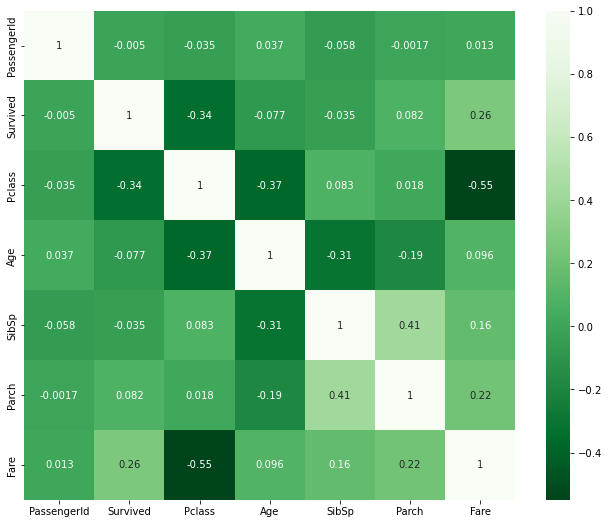

In [9]:
plt.figure(figsize=(11,9))
sns.heatmap(data = A_total.corr(), annot = True, cmap = 'Greens_r')
plt.show()

In [10]:
A_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


<AxesSubplot:xlabel='Fare'>

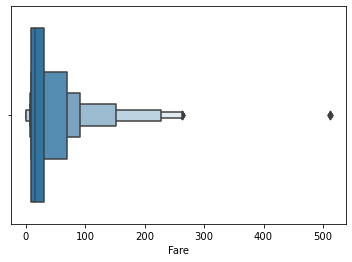

In [11]:
sns.boxenplot(x=A_total["Fare"])

<AxesSubplot:xlabel='Pclass', ylabel='count'>

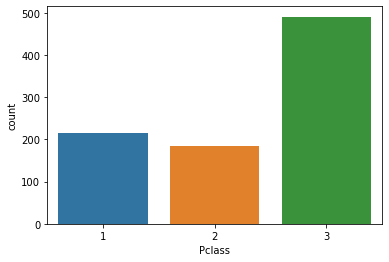

In [12]:
sns.countplot(x=A_total["Pclass"])

In [13]:
#finding mean for pclass.
print(A_total["Pclass"].mean())

2.308641975308642


In [14]:
#finding the median for pclass.
print(A_total["Pclass"].median())

3.0


In [15]:
A_total.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

In [16]:
#dropping empty rows
train_fin = A_total.dropna()

In [17]:
#checking if the rows are dropped
train_fin.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [18]:
#checking shape are dropping
train_fin.shape

(712, 9)

In [19]:
#changing gender to numeric
train_fin.loc[train_fin.Sex=='female','Sex']=1
train_fin.loc[train_fin.Sex=='male','Sex']=0
train_fin["Sex"] = train_fin["Sex"].astype(str).astype(float)

#changing strings to numeric
train_fin.loc[train_fin.Embarked =='S','Embarked']= 3
train_fin.loc[train_fin.Embarked =='C','Embarked']=2
train_fin.loc[train_fin.Embarked =='Q','Embarked']=1
train_fin["Embarked"] = train_fin["Embarked"].astype(str).astype(float)
#dropping passengerid
train_fin = train_fin.drop(['PassengerId'],axis=1)

/var/folders/_v/png6d0td0jvcqb5r51btftz00000gn/T/ipykernel_4316/3586165558.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_fin["Sex"] = train_fin["Sex"].astype(str).astype(float)
/var/folders/_v/png6d0td0jvcqb5r51btftz00000gn/T/ipykernel_4316/3586165558.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_fin["Embarked"] = train_fin["Embarked"].astype(str).astype(float)


In [20]:
#confirming the data
train_fin.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0.0,22.0,1,0,7.2500,3.0
1,1,1,1.0,38.0,1,0,71.2833,2.0
2,1,3,1.0,26.0,0,0,7.9250,3.0
3,1,1,1.0,35.0,1,0,53.1000,3.0
4,0,3,0.0,35.0,0,0,8.0500,3.0


In [21]:
#fixing test data
test['Age'] = test['Age'].fillna(test['Age'].mean())
test['Fare'] = test['Fare'].fillna(test['Fare'].mean())
test.loc[test.Sex=='female','Sex']=1
test.loc[test.Sex=='male','Sex']=0
test["Sex"] = test["Sex"].astype(str).astype(float)
test.loc[test.Embarked =='S','Embarked']= 3
test.loc[test.Embarked =='C','Embarked']=2
test.loc[test.Embarked =='Q','Embarked']=1
test["Embarked"] = test["Embarked"].astype(str).astype(float)
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [22]:
#dropping unwanted columns 
test = test.drop(["Name","Cabin","Ticket"],axis=1)
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,0.0,34.5,0,0,7.8292,1.0
1,893,3,1.0,47.0,1,0,7.0000,3.0
2,894,2,0.0,62.0,0,0,9.6875,1.0
3,895,3,0.0,27.0,0,0,8.6625,3.0
4,896,3,1.0,22.0,1,1,12.2875,3.0


In [23]:
x_test = test.drop("PassengerId",axis=1)

In [24]:
#setting variables for modelling
x = train_fin.drop('Survived', axis=1)
y = train_fin['Survived']

In [25]:
#Modelling
model_dt = GradientBoostingClassifier(min_samples_leaf=5,max_leaf_nodes=5)
model_dt.fit(x,y)
pred_y = model_dt.predict(x)
acc = accuracy_score(y,pred_y)
test_pred = model_dt.predict(x_test)
print(acc)
xgboost = XGBClassifier(learning_rate=0.005,
                       n_estimators=6000,
                       max_depth=4,
                       min_child_weight=0,
                       gamma=0.61,
                       subsample=0.7,
                       colsample_bytree=0.7,
                       objective='reg:squarederror',
                       nthread=-1,
                       scale_pos_weight=1,
                       seed=27,
                       reg_alpha=0.00006,
                       random_state=42)

xgboost.fit(x,y)
pred_xg = xgboost.predict(x)
ac = accuracy_score(y,pred_xg)
test_pred_xg = xgboost.predict(x_test)
print(ac)

0.8792134831460674
0.8876404494382022


In [26]:
#x_reduced = []
#for i in range(1,419):
    #x_reduced.append(x[i])


In [27]:
predictions = [round((i + j) / 2) for i,j in zip(test_pred,test_pred_xg)]
xgboost.fit(x_test,predictions)
predictio = xgboost.predict(x_test)
predictions = [round((i + j) / 2) for i,j in zip(test_pred,predictio)]

model_dt.fit(x_test,predictions)
pred_a = model_dt.predict(x_test)
predictions = [round((i + j) / 2) for i,j in zip(pred_a,predictio)]

model_dt.fit(x_test,predictions)
xgboost.fit(x_test,predictions)
pred_b = model_dt.predict(x_test)
pred_c = xgboost.predict(x_test)
predictions = [round((i + j) / 2) for i,j in zip(pred_b,pred_c)]

model_dt.fit(x_test,predictions)
xgboost.fit(x_test,predictions)
pred_d = model_dt.predict(x_test)
pred_e = xgboost.predict(x_test)
predictions = [round((i + j) / 2) for i,j in zip(pred_d,pred_e)]

output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': predictions})
output.to_csv('submission1.csv', index=False)